In [ ]:
# Install package for visualization purposes
pip install visualkeras

In [ ]:
#============= Import necessary utilities ===============
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import visualkeras

## **Data Pre-processing**

***Τα δεδομένα προεπεξεργάζονται με σκοπό την βέλτιστη απόδοση του δικτύου.***

***Data are being pre-processed, in order to optimize accuracy of each network***

In [ ]:
# A seed to ensure repeatability
random.seed(0)
# Some hyper-parameters and number of classes
batch_size = 250
num_classes = 10
epochs = 50


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(y_test)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(60000, 784) # reshape 60.000 28 x 28 matrices into 60.000 784-length vectors.(784 = 28 * 28)
x_test = x_test.reshape(10000, 784)   # reshape 10.000 28 x 28 matrices into 10.000 784-length vectors.

x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel
x_test /= 255
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

4431872/4422102 [==============================] - 0s 0us/step
[9 2 1 ... 8 1 5]


## **Multi-layer Perceptron**

***Το μοντέλο ορίζεται σύμφωνα με τις προδιαγραφές της άσκησης και στην συνέχεια εκπαιδεύεται***

***The model is being defined, according to project description and afterwards training begins***

In [ ]:
model = Sequential()

model.add(Dense(32,input_shape=((784,)), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 71,146
Trainable params: 71,146
Non-trainable params: 0
_________________________________________________________________


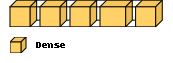

In [ ]:
# Visualize Model
visualkeras.layered_view(model,legend = True)

In [ ]:
# Categorical crossentropy because there are more than two classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use callbacks in order to prevent overfitting

callback = []
save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

# Train the model
hist =  model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs,
          validation_split = 0.1,
          callbacks = callback,
          verbose=1)

Epoch 1/50
216/216 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.7541
Epoch 00001: val_loss improved from inf to 0.46984, saving model to best_weights.hdf5
216/216 [==============================] - 2s 5ms/step - loss: 0.6929 - accuracy: 0.7541 - val_loss: 0.4698 - val_accuracy: 0.8323
Epoch 2/50
215/216 [============================>.] - ETA: 0s - loss: 0.4316 - accuracy: 0.8438
Epoch 00002: val_loss improved from 0.46984 to 0.39898, saving model to best_weights.hdf5
216/216 [==============================] - 1s 4ms/step - loss: 0.4315 - accuracy: 0.8439 - val_loss: 0.3990 - val_accuracy: 0.8528
Epoch 3/50
211/216 [============================>.] - ETA: 0s - loss: 0.3850 - accuracy: 0.8605
Epoch 00003: val_loss improved from 0.39898 to 0.38538, saving model to best_weights.hdf5
216/216 [==============================] - 1s 4ms/step - loss: 0.3849 - accuracy: 0.8606 - val_loss: 0.3854 - val_accuracy: 0.8597
Epoch 4/50
203/216 [===========================>..] -

***Αποτελέσματα και μετρικές***

***Results and metrics calculation***

In [ ]:
# Model Evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8732
Test loss: 0.3622902035713196
Test accuracy: 0.873199999332428


***Οπτικοποίηση των αποτελεσμάτων***

***Visualize results***

Text(0.5, 1.0, 'FC NN Confusion Matrix')

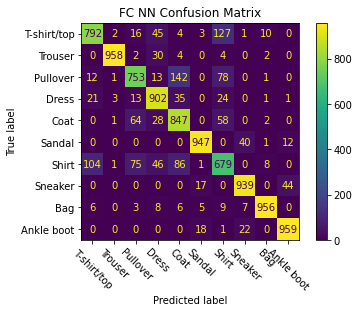

In [ ]:
# make predictions with classifier
y_pred = model.predict(x_test) # predict response using test samples
classes = np.argmax(y_pred,axis=1) # convert to class numbers
# Create confusion matrix
M = confusion_matrix(np.argmax(y_test, axis=1), classes) # revert to decimal class representation

# plotting the confusion matrix
ConfusionMatrixDisplay(M,display_labels=fashion_mnist_labels).plot(xticks_rotation=-45)
plt.title('FC NN Confusion Matrix')

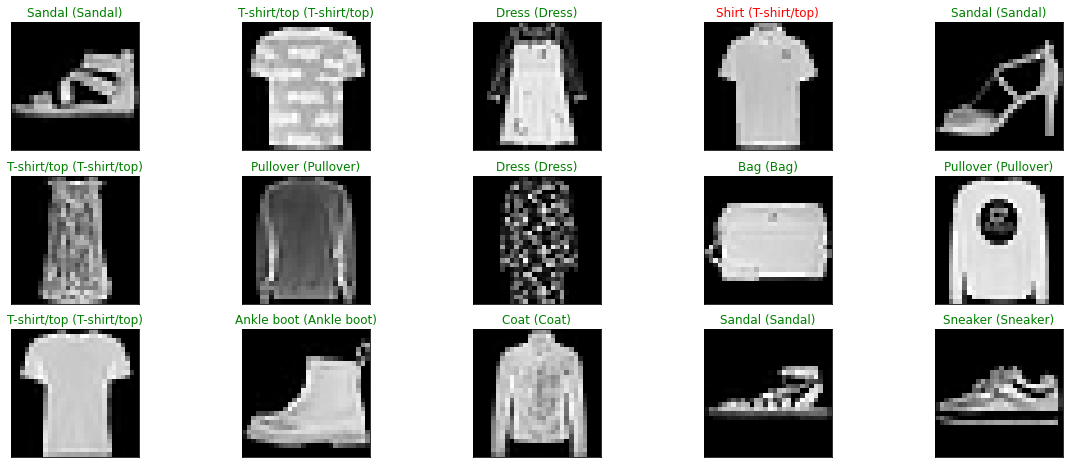

In [ ]:
# Use the model to predict labels of test set
y_pred = model.predict(x_test)


# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape(28,28)),cmap='gray') # reshape image in order to plot
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red")) 
# If the prediction has been made correctly, image title is green, else is red
# Title format : predicted label (true label)

## **Convolutional Network**

## **Data Pre-processing (Again)**

***Τα δεδομένα προεπεξεργάζονται εκ νέου με σκοπό την βέλτιστη απόδοση του δικτύου, αλλά και με τρόπο τέτοιον, ώστε να εισαχθούν κατάλληλα σε CNN .***

***Once again, data is being pre-processed in order to enhance results, but also reshaped for usage of CNN***

In [ ]:
# Re-initialize parameters
batch_size = 250
num_classes = 10
epochs = 50


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(60000, 28, 28, 1) # reshape 60,000 28 x 28 x 1, to represent single channel  
x_test = x_test.reshape(10000, 28, 28, 1)   # reshape 10,000 28 x 28 x 1, to represent single channel  

x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel
x_test /= 255


4431872/4422102 [==============================] - 0s 0us/step


***Το μοντέλο ορίζεται σύμφωνα με τις προδιαγραφές της άσκησης και στην συνέχεια εκπαιδεύεται***

***The model is being defined, according to project description and afterwards training begins***

In [ ]:
model2 = Sequential()
# input layer
model2.add(Conv2D(32, kernel_size=(3, 3),  activation='relu', input_shape=(28,28,1), padding = 'same'))

# First hidden layer
model2.add(Conv2D(32, kernel_size=(3, 3),  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# Second hidden layer
model2.add(Conv2D(64, kernel_size=(3, 3),  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#flattening and final layer
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
model2.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0

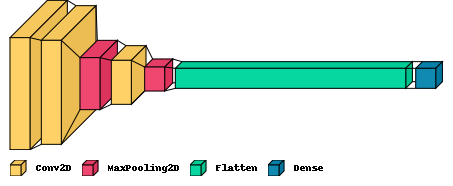

In [ ]:
# Visualize Model
visualkeras.layered_view(model2,legend = True)

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=['accuracy'])

# Use callbacks to prevent overfitting

callback = []
save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

# Train model

hist2 = model2.fit(x_train, y_train,
          #steps_per_epoch = len(x_train)/batch_size,
          batch_size=batch_size, epochs=epochs,
          validation_split = 0.1,
          callbacks = callback,
          verbose=1)

Epoch 1/50
214/216 [============================>.] - ETA: 0s - loss: 0.6631 - accuracy: 0.7602
Epoch 1: val_loss improved from inf to 0.42893, saving model to best_weights.hdf5
216/216 [==============================] - 17s 28ms/step - loss: 0.6614 - accuracy: 0.7608 - val_loss: 0.4289 - val_accuracy: 0.8392
Epoch 2/50
215/216 [============================>.] - ETA: 0s - loss: 0.3855 - accuracy: 0.8633
Epoch 2: val_loss improved from 0.42893 to 0.35528, saving model to best_weights.hdf5
216/216 [==============================] - 6s 26ms/step - loss: 0.3854 - accuracy: 0.8633 - val_loss: 0.3553 - val_accuracy: 0.8713
Epoch 3/50
216/216 [==============================] - ETA: 0s - loss: 0.3292 - accuracy: 0.8819
Epoch 3: val_loss improved from 0.35528 to 0.30311, saving model to best_weights.hdf5
216/216 [==============================] - 6s 26ms/step - loss: 0.3292 - accuracy: 0.8819 - val_loss: 0.3031 - val_accuracy: 0.8895
Epoch 4/50
215/216 [============================>.] - ETA: 0s

***Αποτελέσματα και μετρικές***

***Results and metrics calculus***

In [ ]:
# Model Evaluation
score = model2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2415 - accuracy: 0.9166
Test loss: 0.241521418094635
Test accuracy: 0.9165999889373779


Text(0.5, 1.0, 'CNN Confusion Matrix')

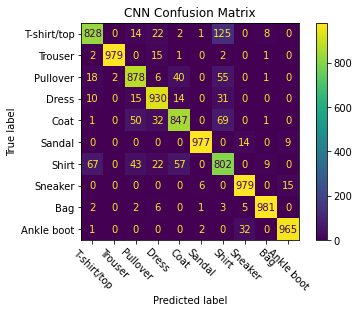

In [ ]:
# make predictions with classifier
y_pred2 = model2.predict(x_test) # predict response using test samples
classes2 = np.argmax(y_pred2,axis=1) # convert to class numbers, in decimal representation

# Create confusion matrix
M = confusion_matrix(np.argmax(y_test, axis=1) , classes2)  # revert to decimal class representation

# plotting the confusion matrix
ConfusionMatrixDisplay(M,display_labels=fashion_mnist_labels).plot(xticks_rotation=-45)
plt.title('CNN Confusion Matrix')

***Οπτικοποίηση των αποτελεσμάτων***

***Results Visualization***

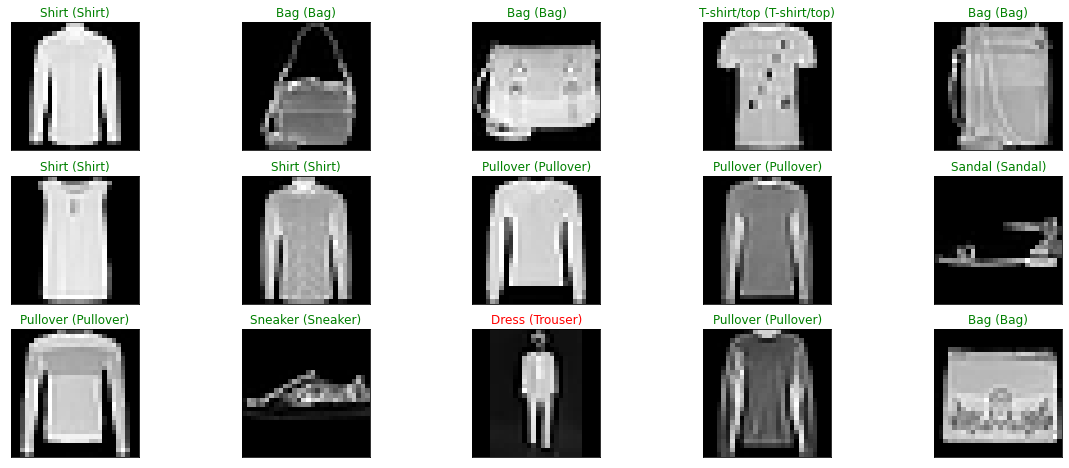

In [ ]:
# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape(28,28)),cmap='gray') # reshape image in order to plot
    predict_index = np.argmax(y_pred2[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red")) 
# If the prediction has been made correctly, image title is green, else is red
# Title format : predicted label (true label)

## **My Network**

***Τα δεδομένα προεπεξεργάζονται εκ νέου με σκοπό την βέλτιστη απόδοση του δικτύου, αλλά και με τρόπο τέτοιον, ώστε να εισαχθούν κατάλληλα σε CNN .***

***Once again, data is being pre-processed in order to enhance results, but also reshaped for usage of CNN***

In [ ]:
# Re-initialize parameters
batch_size = 100
num_classes = 10
epochs = 100


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.reshape(60000, 28, 28, 1) # reshape 60,000 28 x 28 x 1, to represent single channel  
x_test = x_test.reshape(10000, 28, 28, 1)   # reshape 10,000 28 x 28 x 1, to represent single channel  

x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel
x_test /= 255


# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

***Δημιουργία Μοντέλου***

***Model Creation***

In [ ]:
# model creation
mymodel = Sequential()

# Input layer
mymodel.add(BatchNormalization(axis=1)) 
mymodel.add(Conv2D(32, kernel_size=(3, 3),  activation='relu', input_shape=(28,28,1),padding = 'same'))

# First Hidden Layer
mymodel.add(BatchNormalization(axis=1)) 
mymodel.add(Conv2D(64, kernel_size=(3, 3),  activation='relu',padding = 'same'))
mymodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mymodel.add(Dropout(0.3))


# Second Hidden Layer
mymodel.add(BatchNormalization(axis=1)) 
mymodel.add(Conv2D(64, kernel_size=(2, 2),  activation='relu',padding = 'same'))
mymodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mymodel.add(Dropout(0.25))

# Third Hidden Layer
mymodel.add(BatchNormalization(axis=1)) 
mymodel.add(Conv2D(64, kernel_size=(3, 3),  activation='relu',padding = 'same'))
mymodel.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mymodel.add(Dropout(0.35))

#Output Layer
mymodel.add(Flatten())
mymodel.add(BatchNormalization(axis=1))
mymodel.add(Dense(32,activation='relu'))
mymodel.add(Dropout(0.3))
mymodel.add(Dense(10,activation='softmax')) # decision neuron


mymodel.build(input_shape=(batch_size,28,28,1))
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (100, 28, 28, 1)         112       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (100, 28, 28, 32)         320       
                                                                 
 batch_normalization_1 (Batc  (100, 28, 28, 32)        112       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (100, 28, 28, 64)         18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (100, 14, 14, 64)        0         
 2D)                                                             
                                                      

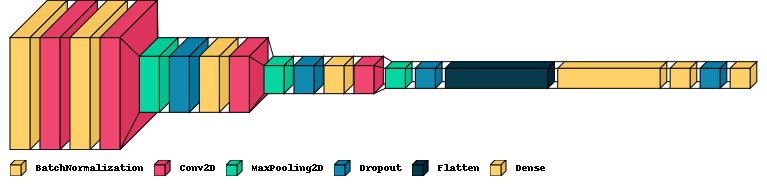

In [ ]:
# Visualize Model
visualkeras.layered_view(mymodel,legend = True) # display using your system viewer

***Εκπαίδευση Μοντέλου***

***Model Training***

In [ ]:
# Model Training

mymodel.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=['accuracy'])

# Use callbacks to prevent overfitting

callback = []
save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)


# Train model
myhist = mymodel.fit( x_train, y_train, 
          #steps_per_epoch = len(x_train)/ batch_size,
          batch_size=batch_size, epochs=epochs,
          validation_split = 0.1,
          callbacks = callback,
          #shuffle = True,
          verbose=1)

Epoch 1/100
539/540 [============================>.] - ETA: 0s - loss: 0.7694 - accuracy: 0.7249
Epoch 00001: val_loss improved from inf to 0.45015, saving model to best_weights.hdf5
540/540 [==============================] - 9s 11ms/step - loss: 0.7689 - accuracy: 0.7251 - val_loss: 0.4501 - val_accuracy: 0.8345
Epoch 2/100
536/540 [============================>.] - ETA: 0s - loss: 0.4778 - accuracy: 0.8262
Epoch 00002: val_loss improved from 0.45015 to 0.32200, saving model to best_weights.hdf5
540/540 [==============================] - 6s 11ms/step - loss: 0.4773 - accuracy: 0.8264 - val_loss: 0.3220 - val_accuracy: 0.8757
Epoch 3/100
536/540 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8527
Epoch 00003: val_loss improved from 0.32200 to 0.30630, saving model to best_weights.hdf5
540/540 [==============================] - 6s 11ms/step - loss: 0.4065 - accuracy: 0.8527 - val_loss: 0.3063 - val_accuracy: 0.8862
Epoch 4/100
537/540 [==========================

***Αποτελέσματα***

***Results***

In [ ]:
# Model Evaluation
score = mymodel.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.1893 - accuracy: 0.9360
Test loss: 0.18925587832927704
Test accuracy: 0.9359999895095825


Text(0.5, 1.0, 'My CNN Confusion Matrix')

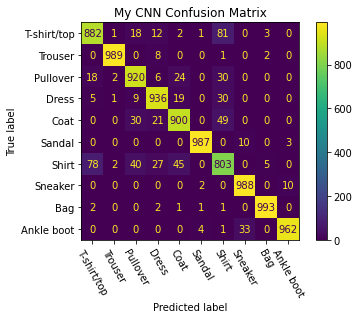

In [ ]:
# make predictions with classifier
y_pred3 = mymodel.predict(x_test) # predict response using test samples
classes3 = np.argmax(y_pred3,axis=1) # convert to class numbers in decimal representation
y2 = np.argmax(y_test,axis=1)
M = confusion_matrix(y2, classes3)  # revert to decimal class representation

# plotting the confusion matrix
ConfusionMatrixDisplay(M,display_labels=fashion_mnist_labels).plot(xticks_rotation=-60)
plt.title('My CNN Confusion Matrix')

***Οπτικοποίηση αποτελεσμάτων***

***Visualize results***

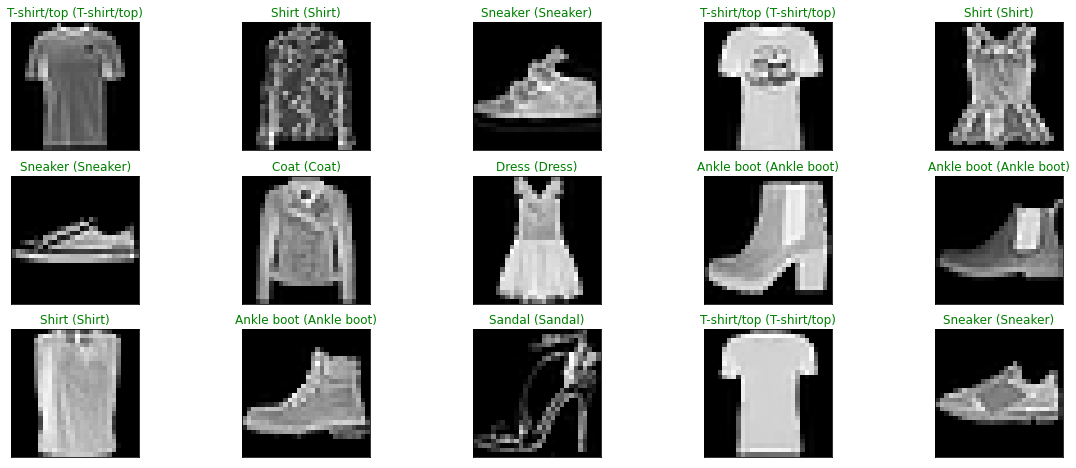

In [ ]:
# Plot a random sample of 15 test images, their predicted labels and their actual labels
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape(28,28)),cmap='gray') # reshape image in order to plot
    predict_index = np.argmax(y_pred3[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red")) 
# If the prediction has been made correctly, image title is green, else is red
# Title format : predicted label (true label)

***Συγκριτικά plot των μετρικών loss, accuracy για κάθε δίκτυο***

***Comparative plots for loss, accuracy for each network/model***

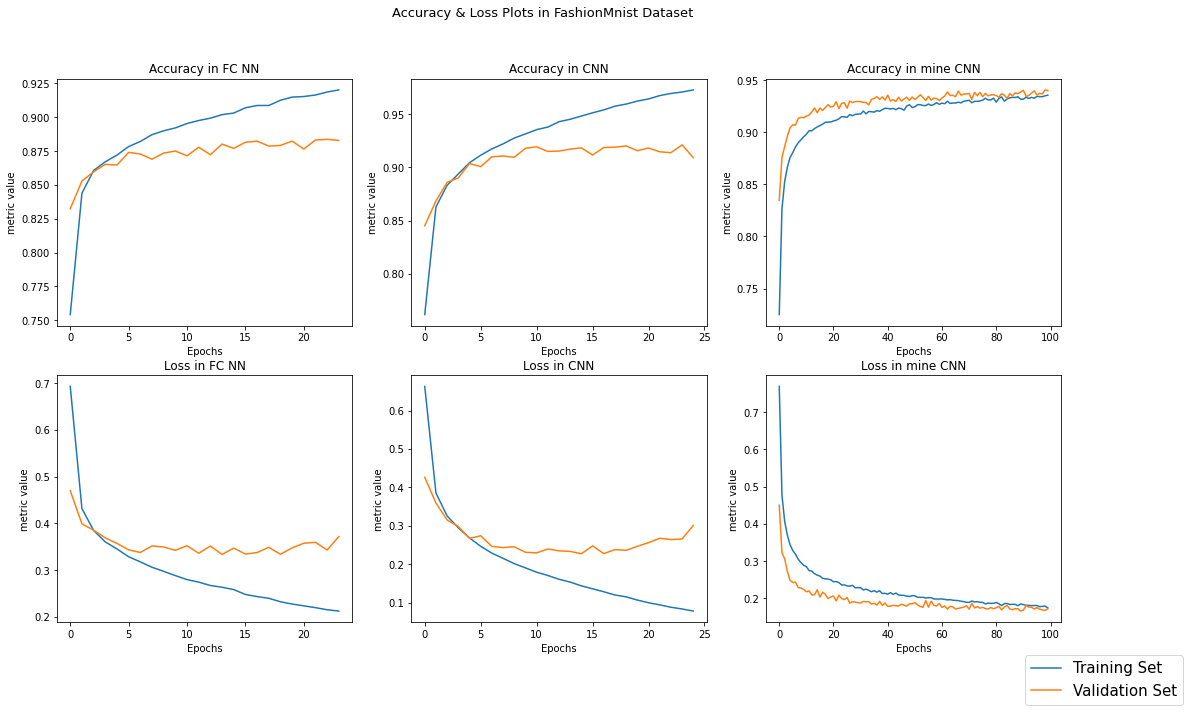

In [ ]:
# Plot Accuracy, Loss Metrics for each model

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

fig.suptitle('Accuracy & Loss Plots in FashionMnist Dataset', fontsize = 13)
# Plot FC NN Metrics
axs[0, 0].plot(hist.history['accuracy'])
axs[0, 0].plot(hist.history['val_accuracy'])
axs[0, 0].set_title('Accuracy in FC NN', fontsize = 12)
axs[1, 0].plot(hist.history['loss'])
axs[1, 0].plot(hist.history['val_loss'])
axs[1, 0].set_title('Loss in FC NN', fontsize = 12)
# Plot CNN Metrics
axs[0, 1].plot(hist2.history['accuracy'])
axs[0, 1].plot(hist2.history['val_accuracy'])
axs[0, 1].set_title('Accuracy in CNN', fontsize = 12)
axs[1, 1].plot(hist2.history['loss'])
axs[1, 1].plot(hist2.history['val_loss'])
axs[1, 1].set_title('Loss in CNN', fontsize = 12)
# Plot mine CNN Metrics
axs[0, 2].plot(myhist.history['accuracy'])
axs[0, 2].plot(myhist.history['val_accuracy'])
axs[0, 2].set_title('Accuracy in mine CNN', fontsize = 12)
axs[1, 2].plot(myhist.history['loss'])
axs[1, 2].plot(myhist.history['val_loss'])
axs[1, 2].set_title('Loss in mine CNN', fontsize = 12)

for ax in axs.flat:
    ax.set(xlabel='Epochs', ylabel='metric value')
fig.legend(['Training Set', 'Validation Set'],loc = 'lower right', fontsize = 15)